In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import csv
# from Qud import *
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
import random
import statsmodels.regression
# NBER recessions
# NBER recessions
from pandas_datareader.data import DataReader
from datetime import datetime
random.seed(2000)
# import warnings
# warnings.filterwarnings(action='once')
from datetime import datetime
from numpy.linalg import LinAlgError
import os
import sys
import warnings
warnings.simplefilter('ignore')

In [4]:
inflation = DataReader('CPIAUCSL', 'fred', start='1947-04-01', end='2018-08-01').resample('MS').last()
dlinf = np.log(inflation).diff().iloc[1:]
dta_rinf = dlinf.loc['1951-01-01':'2018-06-01']*100
dta_rinf

,CPIAUCSL
DATE,
1951-01-01,1.588596
1951-02-01,1.757514
1951-03-01,0.193386
1951-04-01,0.154440
1951-05-01,0.269698
1951-06-01,-0.231125
1951-07-01,-0.077160
1951-08-01,-0.193162
1951-09-01,0.655235


In [6]:
inflation

,CPIAUCSL
DATE,
1947-04-01,22.000
1947-05-01,21.950
1947-06-01,22.080
1947-07-01,22.230
1947-08-01,22.400
1947-09-01,22.840
1947-10-01,22.910
1947-11-01,23.060
1947-12-01,23.410


In [7]:
mod_autoreg2ss = sm.tsa.MarkovAutoregression(
    endog=dta_rinf,k_regimes=2, order=2,switching_ar=True, switching_variance=True)
Fit = mod_autoreg2ss.fit(search_reps = 50,search_scale=2)
print(Fit.summary())

                         Markov Switching Model Results                         
Dep. Variable:                 CPIAUCSL   No. Observations:                  808
Model:             MarkovAutoregression   Log Likelihood                  80.335
Date:                  Wed, 19 Jun 2019   AIC                           -140.671
Time:                          16:08:32   BIC                            -93.725
Sample:                      01-01-1951   HQIC                          -122.645
                           - 06-01-2018                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3135      0.049      6.377      0.000       0.217       0.410
sigma2         0.1242      0.014    

In [8]:
data=dta_rinf.loc['2007-01-01':'2009-10-30']

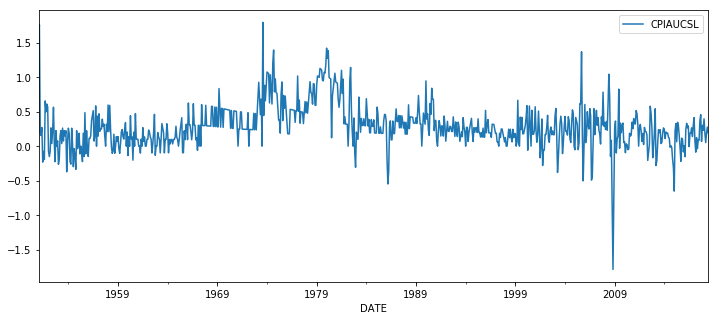

In [9]:
dta_rinf.plot(figsize=(12,5))
plt.show()

In [10]:
dta_rinf.describe()

,CPIAUCSL
count,810.000000
mean,0.284927
std,0.317779
min,-1.786409
25%,0.102015
50%,0.245399
75%,0.425647
max,1.793770


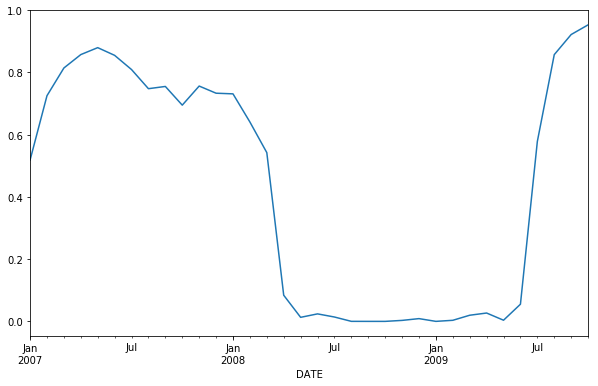

In [36]:
Prob = Fit.smoothed_marginal_probabilities[0]
p=Prob['2007-01-01':'2009-10-30']
p.plot(figsize=(10,6))
plt.show()

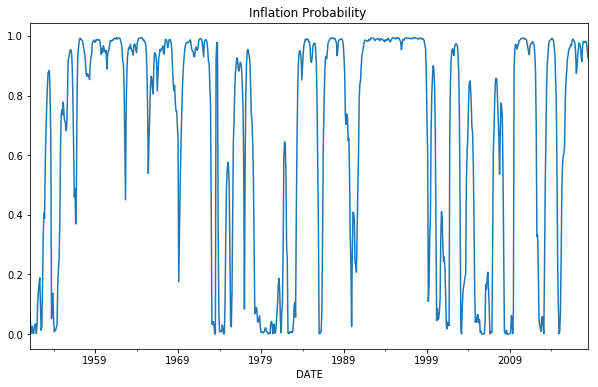

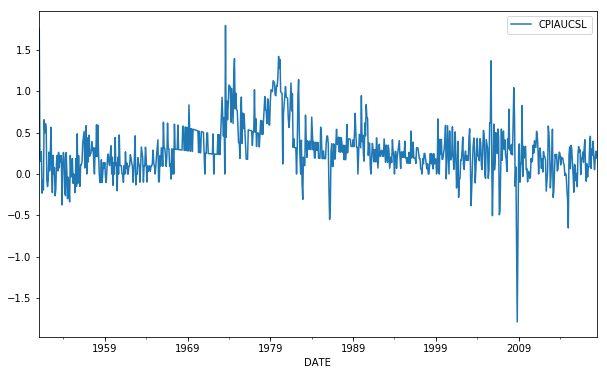

In [11]:
Prob = Fit.smoothed_marginal_probabilities[1]
# P = Prob.resample('W',how='last')
ax =Prob.plot(figsize=(10, 6))
ax.set(title='Inflation Probability ')
ax1 =dta_rinf.plot(figsize=(10, 6))
plt.show()

In [12]:
Prob 

DATE
1951-03-01    0.071641
1951-04-01    0.006968
1951-05-01    0.002879
1951-06-01    0.026208
1951-07-01    0.007500
1951-08-01    0.000342
1951-09-01    0.022276
1951-10-01    0.031987
1951-11-01    0.033432
1951-12-01    0.001568
1952-01-01    0.027517
1952-02-01    0.103986
1952-03-01    0.139554
1952-04-01    0.167160
1952-05-01    0.188383
1952-06-01    0.099589
1952-07-01    0.012349
1952-08-01    0.024031
1952-09-01    0.155344
1952-10-01    0.330854
1952-11-01    0.405894
1952-12-01    0.389021
1953-01-01    0.580057
1953-02-01    0.679803
1953-03-01    0.760771
1953-04-01    0.825448
1953-05-01    0.875456
1953-06-01    0.881564
1953-07-01    0.883885
1953-08-01    0.790290
                ...   
2016-01-01    0.932832
2016-02-01    0.952736
2016-03-01    0.958351
2016-04-01    0.962676
2016-05-01    0.970717
2016-06-01    0.966978
2016-07-01    0.985976
2016-08-01    0.988686
2016-09-01    0.987804
2016-10-01    0.981162
2016-11-01    0.976177
2016-12-01    0.941312
2017-0